Utilice el lenguaje de programación Python para realizar lo siguiente:

1. En un script de python utilice el paquete sklearn.datasets para descargar el dataset Iris Plant. Este dataset tiene 150 vectores de 4 dimensiones divididos en 3 clases (Setosa, Virginica y Versicolor) 

2. Utilice el algoritmo PCA para generar dos nuevas versiones de dataset Iris3D y Iris2D. Iris3D será el resultado de reducir la dimensionalidad original de Iris Plant con las 3 primeras componentes principales de PCA e Iris2D con las 2 primeras componentes.

3. Aplique el algoritmo k-means a las 3 versiones del dataset (Iris plant original, con 4 dimensiones, Iris3D e Iris2D). Deberá usar una k=3 para formar 3 clusters en cada una de las 3 versiones del dataset. Grafique el resultado de la clusterización para Iris3D e Iris2D.

4. Imprima en consola los centros obtenidos para cada una de las 3 versiones del dataset.

5. El clasificador de mínima distancia lo agregará en la próxima clase (viernes 2 de septiembre) con ayuda del profesor. Por lo tanto, la práctica se evaluará hasta el paso 4 debido a que tienen menos tiempo para realizarla.

6. Suba su script a esta plataforma con el nombre ML_Apellidos_NUA_Prac2_irisPlant.ZIP o . RAR, recuerden enviarlo comprimido para evitar bloqueos de seguridad de la plataforma.(recuerde no utilizar caracteres especiales como acentos, ñ, ë, etc.)

In [33]:
import matplotlib.pyplot as plt
plt.rcParams["figure.subplot.right"] = 0.8
import warnings 
warnings.simplefilter("ignore", UserWarning) # Before import module (the one that warns) process.
import numpy as np
import pandas as pd
import itertools 
from sklearn.cluster import KMeans
import mpl_toolkits.mplot3d
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestCentroid
from sklearn.inspection import DecisionBoundaryDisplay
#!pip update scikit-learn
#!pip install scikit-learn==1.1
#from sklearn import inspection#!pip install inspection 

In [58]:
iris = datasets.load_iris()
X = iris.data[:, :4]          # Array like of shape eje0 (150 puntos) de eje1 (dim 4)
y = iris.target               # Etiquetas
t_names = iris.target_names
f_names = iris.feature_names
# In cm as unit of length ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'] 

##Iris Plant visualization or visualizating high dimensional spaces
To see how the species in the dataset are grouped one plots all the features one against the other, so by the end an $N\times N$ matrix, or in particular $4\times4$, thus we can see how sepal_width is compared against sepal_length, then against petal_width, and so forth.

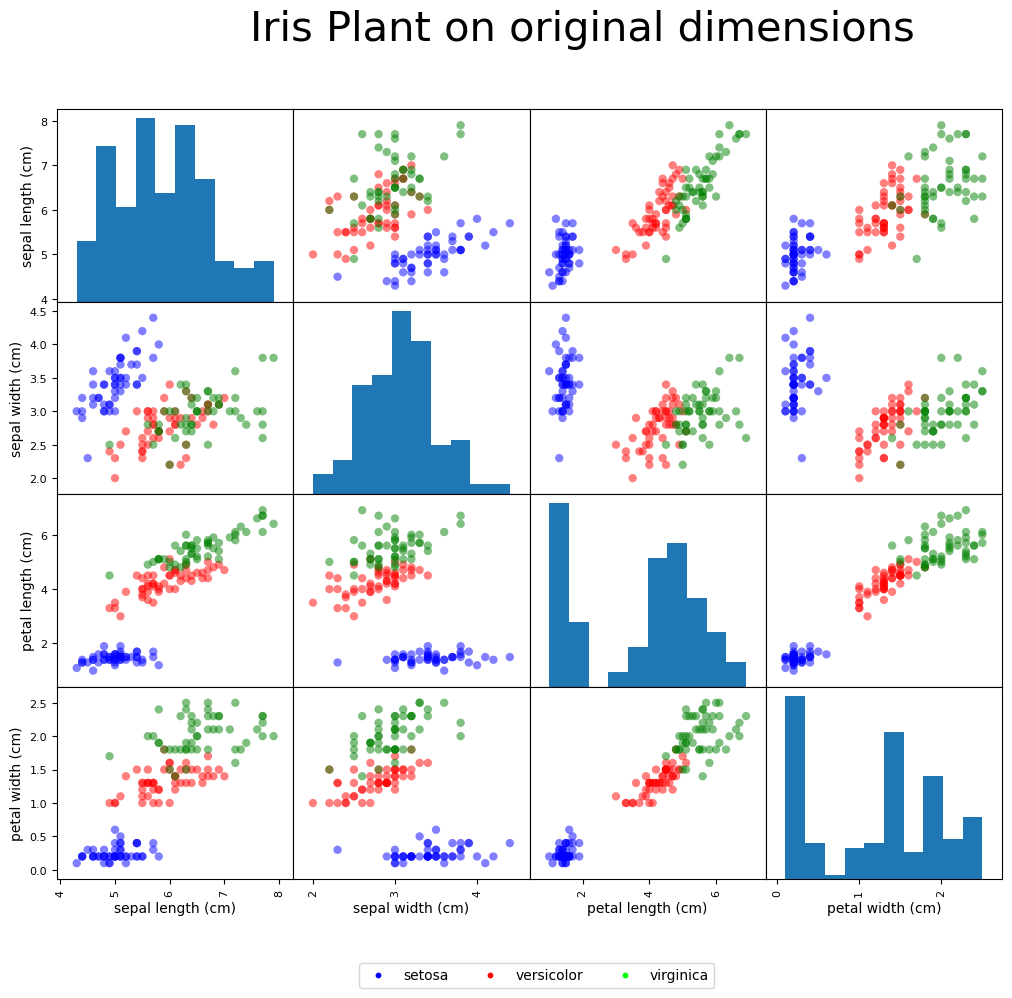

In [35]:
from pandas.plotting import scatter_matrix
LABEL_COLOR_MAP = {0 : 'b',1 : 'r',2 : 'g'} # Cluster color by custom cmap, but matching brg gradient
label_color = [LABEL_COLOR_MAP[l] for l in y]

def handles_f():
    return [plt.plot([],[],color=plt.cm.brg(i/2.), ls="", marker="o", \
                        markersize=np.sqrt(10))[0] for i in range(3)]

def scatter_matrix_plot(X, f_names, t_names, label_color, title):
    df = pd.DataFrame(X, columns = f_names)
    grr = scatter_matrix(df, alpha = 0.5, figsize = (14, 10), diagonal = 'hist',
                          c = label_color, label=t_names, marker='o',range_padding=0.2)
    plt.suptitle(title, size = 30)
    plt.legend(handles_f(), t_names, loc="center", bbox_to_anchor=(-0.97, -0.5), shadow=False, ncol=3)
    plt.show()

scatter_matrix_plot(X, f_names, t_names, label_color, "Iris Plant on original dimensions")


The histograms are the distribution of a single given feature. Either row or column.
We can see how some of the pair plots, show alike colored dots form several clusters with clean boundaries, that is, unlike sepal length and sepal width. Petal length and petal width have very distinctive clusters. From this *We will keep in mind how some features better separate species*.


##Singular Value Decomposition.

Linear dimensionality reduction to project data to a lower dimensional space. 


We know plot the whole of the components, instead of the features, after applying PCA to the dataset. We build an intuition of the workings, now that we clearly see how components that capture more variation, are better at separating species, namely PC1 and PC2 are best choises by the explained variability. Individual variability shown in percentages.

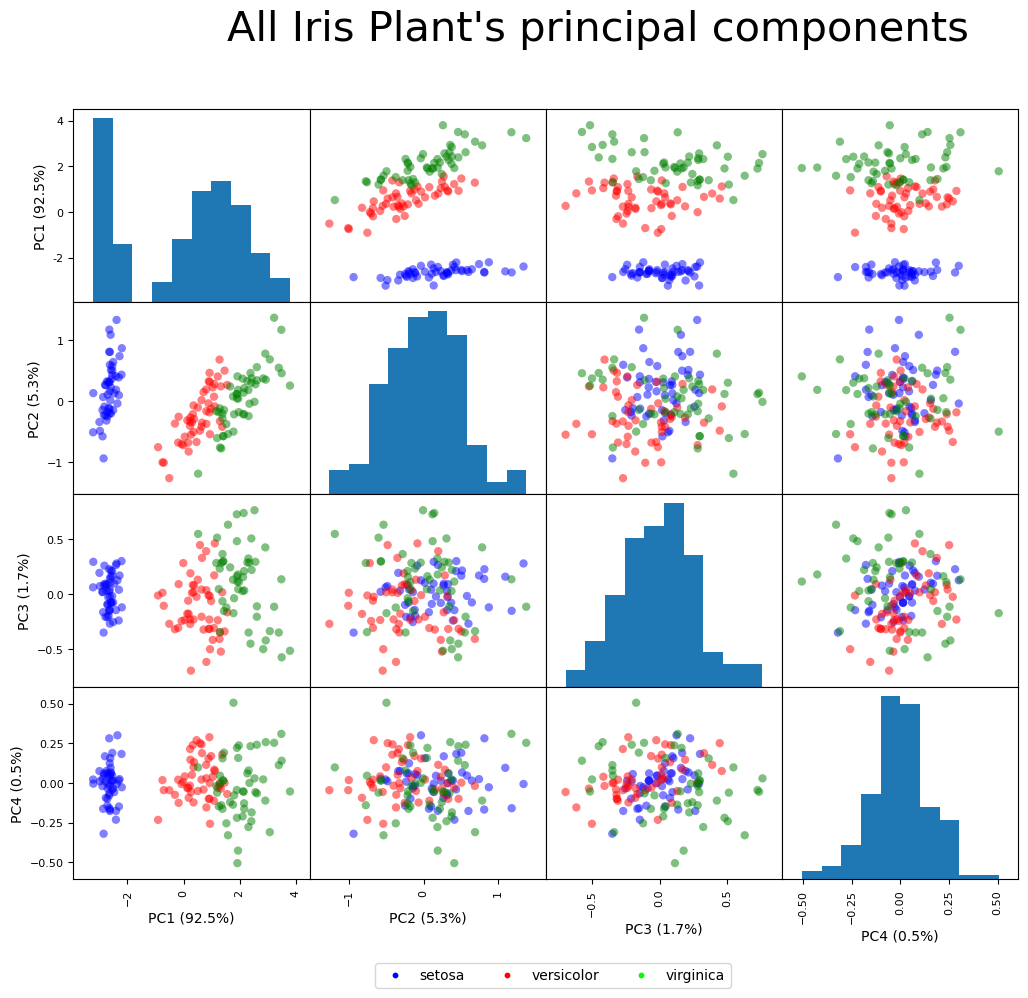

In [36]:
dimensions, pca, components = [2,3,4], [], []
c = 0
for i in dimensions:
    pca.append(PCA(n_components = i)) 
    components.append(pca[c].fit_transform(X)) # Fit model with X and apply dimensionality reduction on X
    c += 1
PCn_names = ["PC{} ({:.1%})".format(i+1, variance) for i, variance in enumerate(pca[2].explained_variance_ratio_)]
scatter_matrix_plot(components[2], PCn_names, t_names, label_color, "All Iris Plant's principal components")

Databases can have many features and a simplification over looking out the most relevant information is a breath.
A **high percentage of captured explained variance by a PC means they may sufice for modelling the given dataset**. We then visualize the first 2, and then, 3 components while paying attention to their variance (increases with components although not by much) and at how kmeans better helps us discern between clusters.  

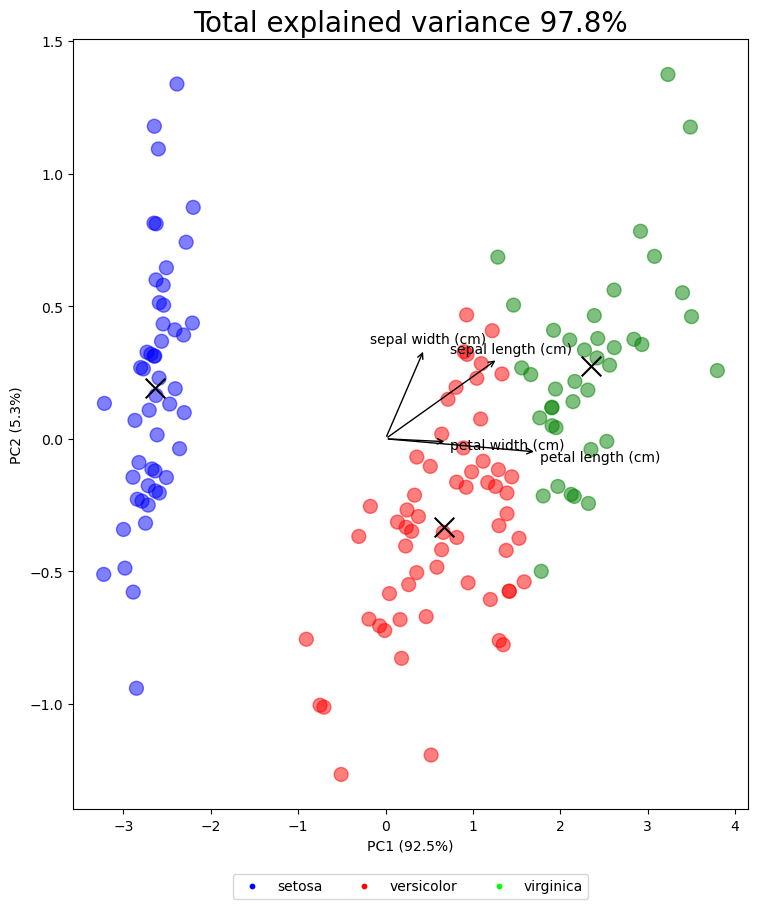

In [42]:
kmeans_pca = KMeans(n_clusters = 3)
X4_clustered = kmeans_pca.fit_predict(components[2])  # Compute cluster centers and predict cluster index for each sample
X3_clustered = kmeans_pca.fit_predict(components[1])
centers3 = kmeans_pca.cluster_centers_
X2_clustered = kmeans_pca.fit_predict(components[0])
centers2 = kmeans_pca.cluster_centers_

label_color = [LABEL_COLOR_MAP[l] for l in X2_clustered]

loadings = pca[0].components_.T * np.sqrt(pca[0].explained_variance_)

plt.figure(figsize = (10,10))
plt.scatter(components[0][:,0],components[0][:,1],s=100., c= label_color, alpha=0.5)
plt.scatter(centers2[:,0],centers2[:,1],s=200., c= 'black',marker='x', alpha=1)
for i, feature in enumerate(f_names):
    plt.annotate(f_names[i], xy=(0,0), xytext=(loadings[i, 0], loadings[i, 1]),
                  arrowprops={"arrowstyle":"<-","color":"black","animated":"True"})
plt.title("Total explained variance {:.1%}".format(pca[0].explained_variance_ratio_.sum()),size=20)
plt.xlabel("PC1 ({:.1%})". format(pca[0].explained_variance_ratio_[0]))
plt.ylabel("PC2 ({:.1%})". format(pca[0].explained_variance_ratio_[1]))
plt.legend(handles_f(), t_names, loc="center", bbox_to_anchor=(0.5, -0.1), shadow=False, ncol=3)
plt.show()

##Loadings

$$Loadings = \sqrt\lambda \cdot u_i$$

$\lambda$=eigenvalue,
$u_i$= i-th eigenvector, 
$\lambda=\sigma^2$=covariance

We look at the loadings "scaled eigenvectors" to help us interpret PC. Since these are the linear combination weights $\sigma$ (the coefficients) of unit-scaled components $u_i$ that define "load" the variables. That is, loadings are the covariances/correlations between the original variables and the unit-scaled components.

Thus, loadings become **comparable by magnitude with the covariances/correlations observed between the variables**, *because what had been drawn out from the variables' covariation (because of the PCA process over the data) now returns back* in the form of the covariation between the variables and the principal components.

Loading matrix is informative: its vertical sums of squares are the eigenvalues, components' variances, and its horizontal sums of squares are portions of the variables' variances being "explained" by the components.

*explain what our loadingmatrix means particularly*

In [56]:
# For the 2 PC case
# Vertical sum of squares
ev = [sum([loadings[i, j]**2 for i in range(loadings.shape[0])]) for j in range(loadings.shape[1])]
print(["Eigenvalue of PC{}: {:.2f}".format(i+1, ev[i]) for i in range(loadings.shape[1])])
# Which is the same as:
print("Explained variance: {}".format(pca[0].explained_variance_))

# Horizontal sum of squares
ex = [sum([loadings[j, i]**2 for i in range(loadings.shape[1])]) for j in range(loadings.shape[0])]
print(["Portion of var. variances of PC{}: {:.2f}".format(i+1, ex[i]) for i in range(loadings.shape[0])])

['Eigenvalue of PC1: 4.23', 'Eigenvalue of PC2: 0.24']
Explained variance: [4.22824171 0.24267075]
['Portion of var. variances of PC1: 0.66', 'Portion of var. variances of PC2: 0.16', 'Portion of var. variances of PC3: 3.11', 'Portion of var. variances of PC4: 0.54']


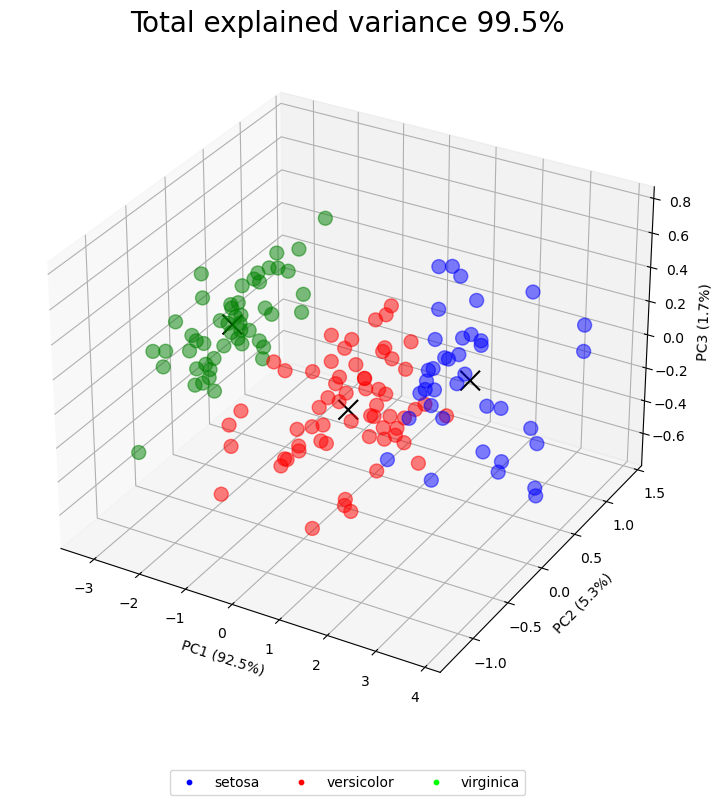

In [43]:
label_color = [LABEL_COLOR_MAP[l] for l in X3_clustered]


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
ax.scatter(components[1][:,0],components[1][:,1],components[1][:,2],s=100., c= label_color, alpha=0.5) 
ax.scatter(centers3[:,0],centers3[:,1],centers3[:,2],s=200., c= 'black',marker='x', alpha=1)
plt.title("Total explained variance {:.1%}".format(pca[1].explained_variance_ratio_.sum()), size=20)
ax.set_xlabel("PC1 ({:.1%})". format(pca[1].explained_variance_ratio_[0]))
ax.set_ylabel("PC2 ({:.1%})". format(pca[1].explained_variance_ratio_[1]))
ax.set_zlabel("PC3 ({:.1%})". format(pca[1].explained_variance_ratio_[2]))

plt.legend(handles_f(), t_names, loc="center", bbox_to_anchor=(0.5, -0.1), shadow=False, ncol=3)
plt.show()

We may, for higher dimensional datasets than iris, easily decide how many components to analyze by plotting the cumulative sum of explained variance, **ultimately striving for better performance at training models**.

*show performance of clustering dpending on PC choosing*
*explain plot below*

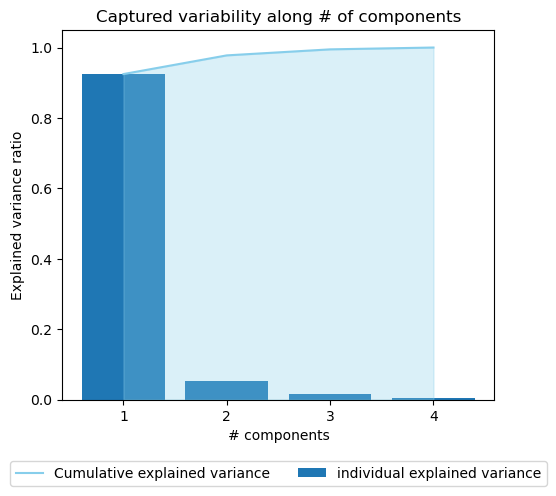

In [69]:
exp_var_cumul = np.cumsum(pca[2].explained_variance_ratio_)
plt.bar(range(1,len(pca[2].explained_variance_ratio_)+1), pca[2].explained_variance_ratio_, label="individual explained variance")
plt.fill_between(np.linspace(1, exp_var_cumul.shape[0], num=4), exp_var_cumul, color="skyblue", alpha=0.3)
plt.plot(np.linspace(1, exp_var_cumul.shape[0], num=4), exp_var_cumul, color="skyblue", label="Cumulative explained variance")
plt.xticks(np.arange(1, exp_var_cumul.shape[0] + 1, 1))
plt.title("Captured variability along # of components")
plt.xlabel("# components")
plt.ylabel("Explained variance ratio")
plt.legend(loc="center", bbox_to_anchor=(0.5, -0.2), shadow=False, ncol=2)
plt.show()